## Panda's Basics

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
# Create pd.ExcelFile() object
xls = pd.ExcelFile('listings.xlsx')

# Extract sheet names and store in exchanges
exchanges = xls.sheet_names

# Create listings dictionary with all sheet data
listings = pd.read_excel(xls, sheetname=exchanges, na_values='n/a')

# Inspect NASDAQ listings
listings['nasdaq'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
Stock Symbol             3167 non-null object
Company Name             3167 non-null object
Last Sale                3165 non-null float64
Market Capitalization    3167 non-null float64
IPO Year                 1386 non-null float64
Sector                   2767 non-null object
Industry                 2767 non-null object
dtypes: float64(3), object(4)
memory usage: 173.3+ KB


/usr/local/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


### Stacking sheets into 1 df

In [11]:
# Create the pd.ExcelFile() object
xls = pd.ExcelFile('listings.xlsx', na_values = 'n/a')

# Extract the sheet names from xls
exchanges = xls.sheet_names

# Create an empty list: listings
listings = []

# Import the data
for exchange in exchanges:
    listing = pd.read_excel('listings.xlsx', sheetname=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)

# Concatenate the listings: listing_data
listing_data = pd.concat(listings)

# Inspect the results
listing_data.info()

/usr/local/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6674 entries, 0 to 3146
Data columns (total 8 columns):
Stock Symbol             6674 non-null object
Company Name             6674 non-null object
Last Sale                6590 non-null float64
Market Capitalization    6674 non-null float64
IPO Year                 2852 non-null float64
Sector                   5182 non-null object
Industry                 5182 non-null object
Exchange                 6674 non-null object
dtypes: float64(3), object(5)
memory usage: 469.3+ KB


## Accesing Data Online

In [4]:
from pandas_datareader.data import DataReader

In [5]:
from datetime import date # Date & time functionality

In [20]:
import matplotlib.pyplot as plt

In [ ]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Set start and end dates
start = date(2016, 1, 1)
end = date(2016, 12, 31)

# Set the ticker and data_source
ticker = 'FB'
data_source = 'google'

# Import the data using DataReader
stock_prices = DataReader(ticker, data_source, start, end)

# Plot Close
stock_prices['Close'].plot(title=ticker)

# Show the plot
plt.show()

In [12]:
series_code = 'DGS10'
data_source = 'fred'
start = date(1962,1,1)

In [13]:
data = DataReader(series_code, data_source, start)

In [15]:
series_name = '10-year Treasury'

In [17]:
data = data.rename(columns = {series_code: series_name})

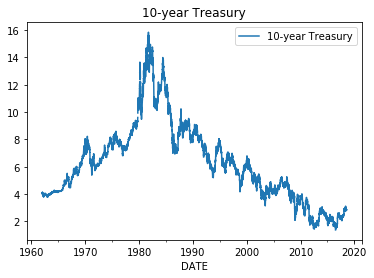

In [21]:
data.plot(title=series_name); plt.show()

In [32]:
start = date(2000, 1, 1)

In [36]:
series = 'DCOILWTICO'

In [37]:
oil = DataReader(series, 'fred', start)

In [38]:
ticker = 'XOM'

In [40]:
stock = DataReader(ticker, 'yahoo', start)

In [44]:
data = pd.concat([stock[['Close']], oil], axis=1) # horizontally merged

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4840 entries, 2000-01-03 to 2018-07-20
Freq: B
Data columns (total 2 columns):
Close         4667 non-null float64
DCOILWTICO    4655 non-null float64
dtypes: float64(2)
memory usage: 113.4 KB


In [48]:
data.columns = ['Exxon', 'Oil Price']

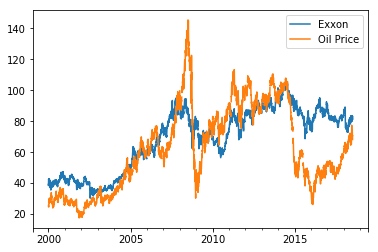

In [49]:
data.plot(); plt.show()

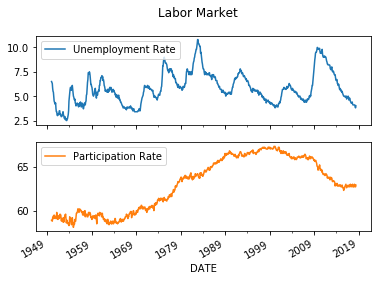

In [50]:
## With Subplots
# Set the start date
start = date(1950, 1, 1)
series = ['UNRATE', 'CIVPART']
econ_data = DataReader(series, 'fred', start)
econ_data.columns = ['Unemployment Rate', 'Participation Rate']
econ_data.plot(subplots=True, title='Labor Market')
plt.show()

In [ ]:
# Stocks vs Bonds
# Set the start date
start = date(2008,1,1)
series = ['BAMLHYH0A0HYM2TRIV', 'SP500'] #  Bank of America Merrill Lynch US High Yield Total Return Index Value
data = DataReader(series,'fred',start)
data.plot(subplots=True,title='Performance Comparison')
plt.show()

In [ ]:
## Can get panel data into multi-index DF w/ unstack function

###  Summarize your data

###  Visualize your data

In [2]:
import seaborn as sns

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot a basic histogram of income per capita
sns.distplot(income['Income per Capita']); plt.show()
sns.distplot(income['Income per Capita'], bins  = 50, kde=False, rug=True); plt.show()

In [ ]:
growth = pd.read_csv('income_growth.csv', parse_dates=True).set_index('DATE')
growth.describe()
for column in growth.columns:
    sns.distplot(growth[column], hist=False, label=column)
plt.show()

In [ ]:
# Categorical variables visualization
# Create the list exchanges
exchanges = ['amex', 'nasdaq', 'nyse']

# Iterate over exchanges then plot and show result
for exchange in exchanges:
    sectors = listings[exchange].Sector.value_counts()
    # Sort in descending order and plot
    sectors.sort_values(ascending=False).plot(kind='bar')
    # Show the plot
    plt.show()

In [ ]:
# Create lists
exchanges = ['amex', 'nasdaq', 'nyse']
all_listings = []
# Use for loop to create listing_data
for exchange in exchanges:
    all_listings.append(listings[exchange])
# Combine DataFrames
listing_data = pd.concat(all_listings)
# Select tech companies
tech_companies = listing_data[listing_data.Sector == 'Technology']
# Create ipo_years
ipo_years = tech_companies['IPO Year']
# Drop missing values and convert to int
ipo_years = ipo_years.dropna().astype(int)
# Count values, sort by year, and create a bar plot
ipo_years.value_counts(ascending=True).plot(kind='bar', title='Tech IPOs by Year')
# Rotate xticks and show result
plt.xticks(rotation=45)
# Show the plot
plt.show()

### Aggregation

In [2]:
listings = pd.read_excel('listings.xlsx')

In [5]:
listings.head()

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,XXII,"22nd Century Group, Inc",1.3300,1.206285e+08,NaN,Consumer Non-Durables,Farming/Seeds/Milling
1,FAX,Aberdeen Asia-Pacific Income Fund Inc,5.0000,1.266333e+09,1986.0,NaN,NaN
2,IAF,Aberdeen Australia Equity Fund Inc,6.1500,1.398653e+08,NaN,NaN,NaN
3,CH,"Aberdeen Chile Fund, Inc.",7.2201,6.756346e+07,NaN,NaN,NaN
4,ABE,Aberdeen Emerging Markets Smaller Company Oppo...,13.3600,1.288430e+08,NaN,NaN,NaN


In [84]:
# Group listings by Sector and Exchange
#by_sector_exchange = listings.groupby(['Sector', 'Exchange'])

# Calculate the median market cap
#mcap_by_sector_exchange = by_sector_exchange.market_cap_m.median()

# Display the head of the result
# print(mcap_by_sector_exchange.head())

# Unstack mcap_by_sector_exchange
# mcap_unstacked = mcap_by_sector_exchange.unstack()

# Plot as a bar chart
#mcap_unstacked.plot(kind='bar', title='Median Market Capitalization by Exchange')

# Set the x label
#plt.xlabel('USD mn')

# Show the plot
#plt.show()

In [ ]:
# Create market_cap_m
listings['market_cap_m'] = listings['Market Capitalization'].div(1e6)

# Group listing by both Sector and Exchange
by_sector_exchange = listings.groupby(['Sector', 'Exchange'])

# Subset market_cap_m of by_sector_exchange
bse_mcm = by_sector_exchange['market_cap_m']

# Calculate mean, median, and std in summary
summary = bse_mcm.agg({'Average': 'mean', 'Median': 'median', 'Standard Deviation': 'std'})

# Print the summary
print(summary)

In [19]:
listings = listing_data

/usr/local/Cellar/ipython/6.4.0/libexec/vendor/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


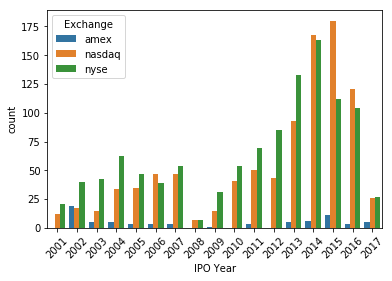

In [20]:
# Select IPOs after 2000
listings = listings[listings['IPO Year'] > 2000]

# Convert IPO Year to integer
listings['IPO Year'] = listings['IPO Year'].astype(int)

# Create a countplot
sns.countplot(x='IPO Year', hue='Exchange', data=listings)

# Rotate xticks and show result
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [23]:
income_trend = pd.read_csv('https://assets.datacamp.com/production/course_3882/datasets/per_capita_income.csv')

In [29]:
# Inspect the data
#income_trend.info()

# Create barplot
#sns.barplot(x='Year', y='Income per Capita', data=income_trend)

# Rotate xticks
#plt.xticks(rotation=45)

# Create second barplot
#sns.barplot(x='Year', y='Income per Capita', data=income_trend, estimator=np.median)

# Rotate xticks
#plt.xticks(rotation=45)

# Show the plot
#plt.show()

In [ ]:
https://assets.datacamp.com/production/course_3882/datasets/per_capita_income.csv

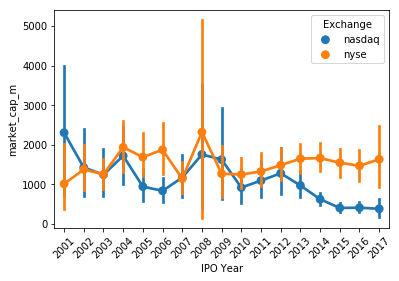

In [26]:
# Exclude IPOs before 2000 and from the 'amex'
listings = listings[(listings['IPO Year'] > 2000) & (listings.Exchange != 'amex')]

# Convert IPO Year to integer
listings['IPO Year'] = listings['IPO Year'].astype(int)

# Create market_cap_m
listings['market_cap_m'] = listings['Market Capitalization'].div(1e6)

# Exclude outliers
listings = listings[listings.market_cap_m < listings.market_cap_m.quantile(.95)]

# Create the pointplot
sns.pointplot(x='IPO Year', y='market_cap_m', hue='Exchange', data=listings)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()


#### Distribution by category

In [64]:
iris = datasets.load_iris()

In [65]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [76]:
lookup_table = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [79]:
iris_df['Species'] = iris_df['Species'].map(lookup_table)

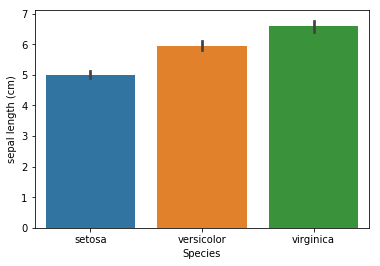

In [85]:
sns.barplot(x='Species', y = 'sepal length (cm)', data = iris_df)

In [83]:
# Create boxplot
# sns.boxplot(x='Country', y='Inflation', data=inflation)
# Show the plot
# plt.show()
# Close the plot
#plt.close()
# Create swarmplot
#sns.swarmplot(x='Country', y='Inflation', data=inflation)
# Show the plot
# plt.show()


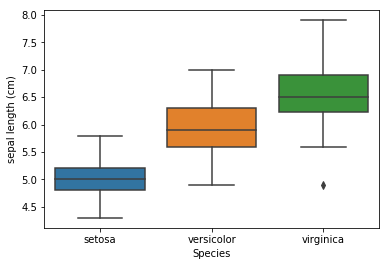

In [81]:
sns.boxplot(x='Species', y = 'sepal length (cm)', data = iris_df)

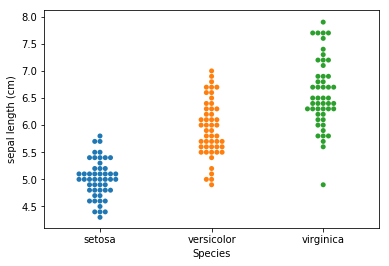

In [82]:
sns.swarmplot(x='Species', y = 'sepal length (cm)', data = iris_df)